<a href="https://colab.research.google.com/github/omarhisham007/Deep-Learning/blob/main/gender_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.7.0.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/content/gender_input_output
! ls

/content/drive/MyDrive/content/gender_input_output
input  output


# Import **Libraries**

In [4]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf

from google.colab.patches import cv2_imshow

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPooling2D,AvgPool2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


# **Import The Dataset in My Drive**

In [7]:
path = "/content/drive/MyDrive/content/gender_input_output/input/UTKFace"
pixels = []
age = []
gender = [] 

i=0
#Read All Images
for img in os.listdir(path):
  i=i+1
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))       
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)     #Convert All BGR Image to Grayscale Image
  img=cv2.resize(img,(100,100))                  # Resize All Images 100*100
  pixels.append(np.array(img))
  gender.append(np.array(genders))

pixels = np.array(pixels)
gender = np.array(gender,np.uint64)

In [8]:
len(pixels)    #Print the length of Pixels

23708

In [9]:
len(gender)    #Print the length of Gender Images

23708

In [10]:
#Split the Dataset into Train - Test
x_train,x_test,y_train,y_test = train_test_split(pixels,gender,random_state=42)

In [11]:
len(x_train)

17781

In [12]:
len(x_test)

5927

In [13]:
# CNN Architecture
input = Input(shape = (100,100,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(2,activation="sigmoid")(drop_1)

In [14]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam",loss=["sparse_categorical_crossentropy"],metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                             

In [15]:
# Model Checkpoint
model_path='./output/gender_model.h5'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [16]:
# CNN Model Training
save = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40,callbacks=[callback_list])

Epoch 1/40
556/556 [==============================] - ETA: 0s - loss: 1.2730 - accuracy: 0.7443
Epoch 00001: loss improved from inf to 1.27295, saving model to ./output/gender_model.h5
556/556 [==============================] - 23s 24ms/step - loss: 1.2730 - accuracy: 0.7443 - val_loss: 0.5887 - val_accuracy: 0.8259
Epoch 2/40
555/556 [============================>.] - ETA: 0s - loss: 0.5140 - accuracy: 0.8418
Epoch 00002: loss improved from 1.27295 to 0.51390, saving model to ./output/gender_model.h5
556/556 [==============================] - 13s 24ms/step - loss: 0.5139 - accuracy: 0.8419 - val_loss: 0.4941 - val_accuracy: 0.8419
Epoch 3/40
556/556 [==============================] - ETA: 0s - loss: 0.4564 - accuracy: 0.8606
Epoch 00003: loss improved from 0.51390 to 0.45637, saving model to ./output/gender_model.h5
556/556 [==============================] - 13s 24ms/step - loss: 0.4564 - accuracy: 0.8606 - val_loss: 0.4257 - val_accuracy: 0.8701
Epoch 4/40
556/556 [==================

# **Loading Test Images**

In [36]:
img_path = "/content/drive/MyDrive/content/Test_input/kartik_aryan.jpg"

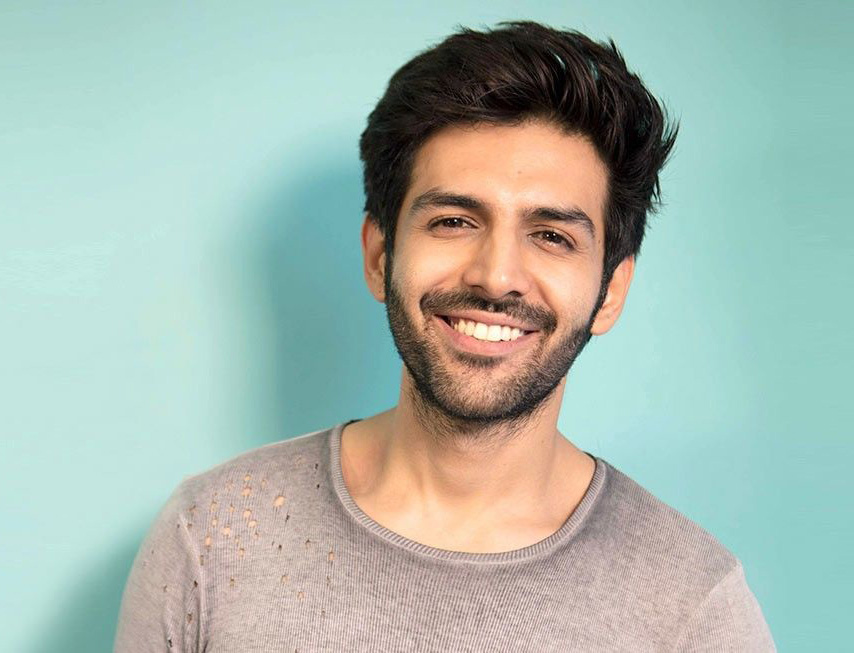

In [37]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

In [38]:
# load  model
export_dir='/content/drive/MyDrive/content/gender_input_output/output/gender_model.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                             

In [39]:
# Labels on Gender

gender_ranges = ['male', 'female']

1: male


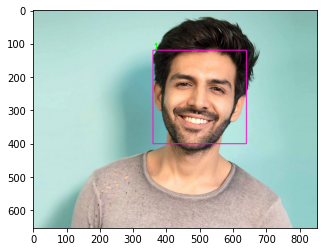

In [40]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/content/Test_input/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]




  output_str = str(i) + ": "+  output_gender 
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [41]:
img_path = "/content/drive/MyDrive/content/Test_input/priyanka_chopra.jpg"

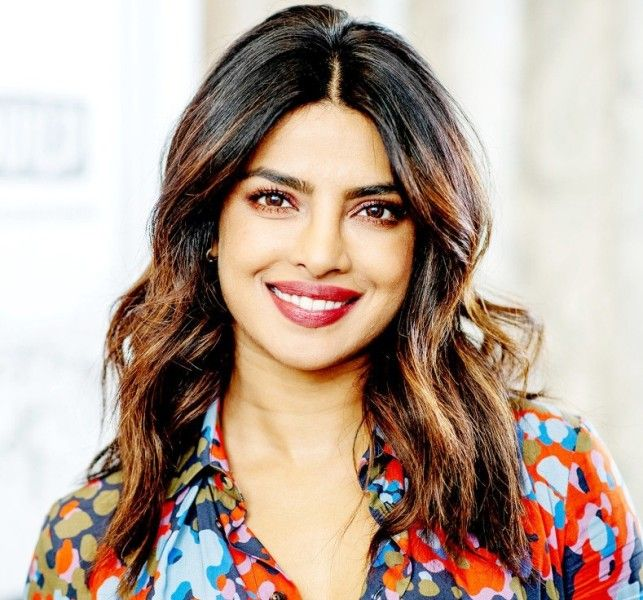

In [43]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

1: female


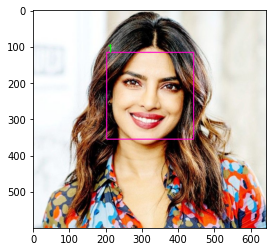

In [44]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/content/Test_input/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]




  output_str = str(i) + ": "+  output_gender 
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))